In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import sys
sys.setrecursionlimit(10000)
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.spatial.distance import euclidean

In [2]:
df = pd.read_csv('/content/online_shoppers_intention.csv')

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.Revenue.value_counts(dropna=False)

,count
Revenue,
False,10422
True,1908


In [5]:
# 1. Análise descritiva básica
print("Análise descritiva básica:")
print(df.describe())
print("\nTipos de dados:")
print(df.dtypes)

Análise descritiva básica:
       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%              

In [6]:
# 2. Verificar valores ausentes
print("\nValores ausentes por coluna:")
missing_values = df.isnull().sum()
print(missing_values)


Valores ausentes por coluna:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


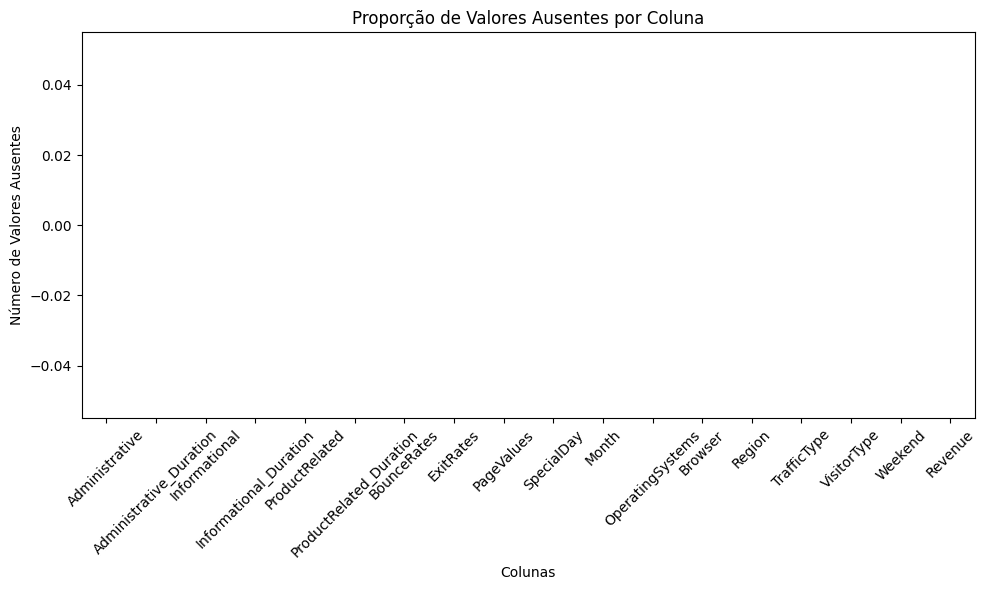

In [7]:
# Visualizar a proporção de valores ausentes
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar')
plt.title('Proporção de Valores Ausentes por Coluna')
plt.xlabel('Colunas')
plt.ylabel('Número de Valores Ausentes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

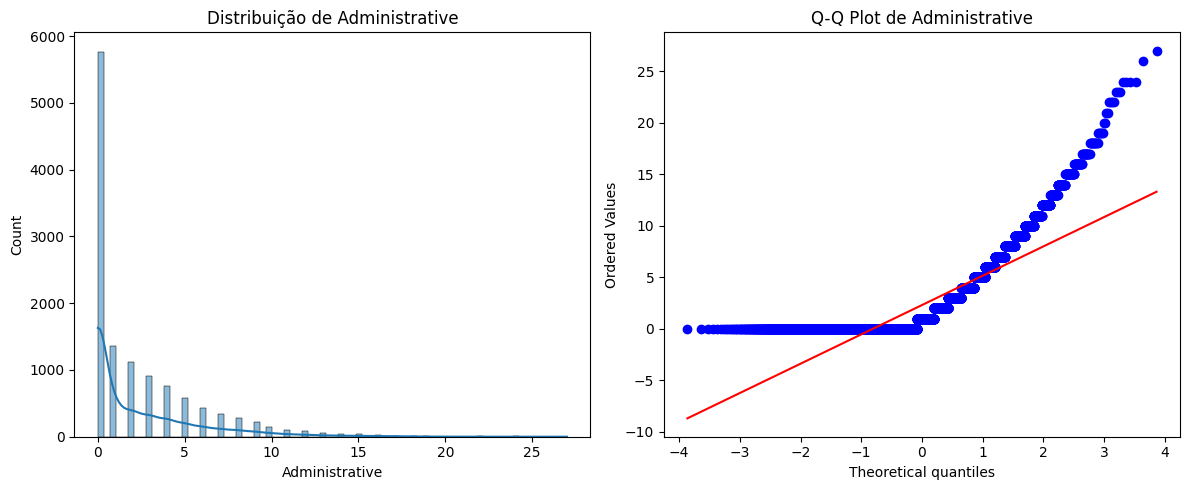

Teste de normalidade para Administrative: p-value = 0.0000


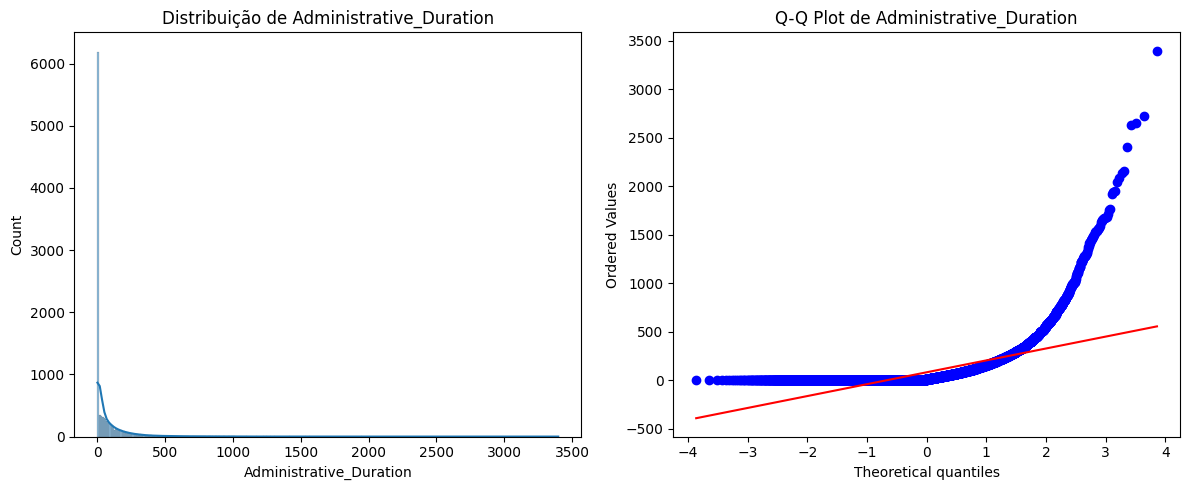

Teste de normalidade para Administrative_Duration: p-value = 0.0000


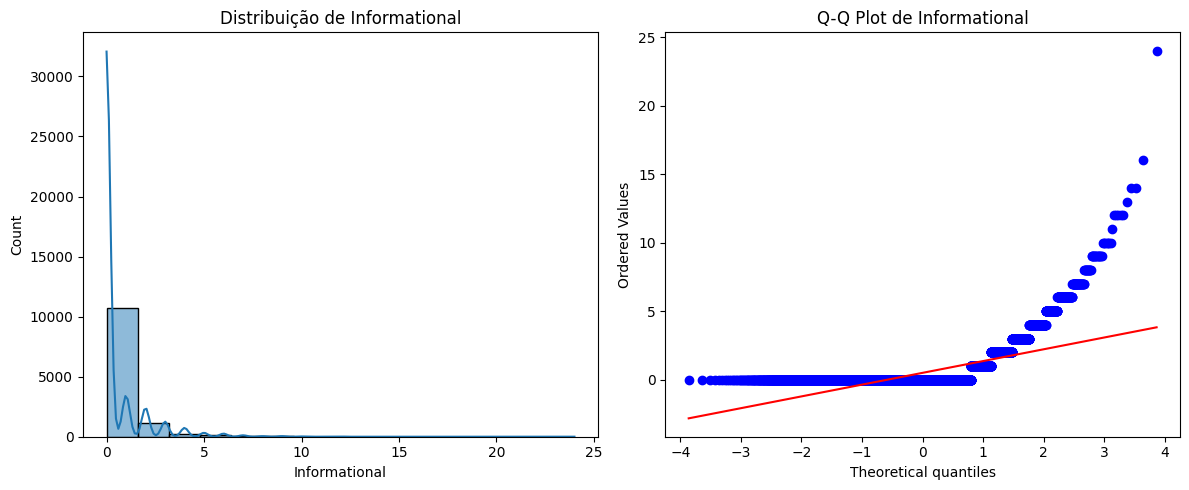

Teste de normalidade para Informational: p-value = 0.0000


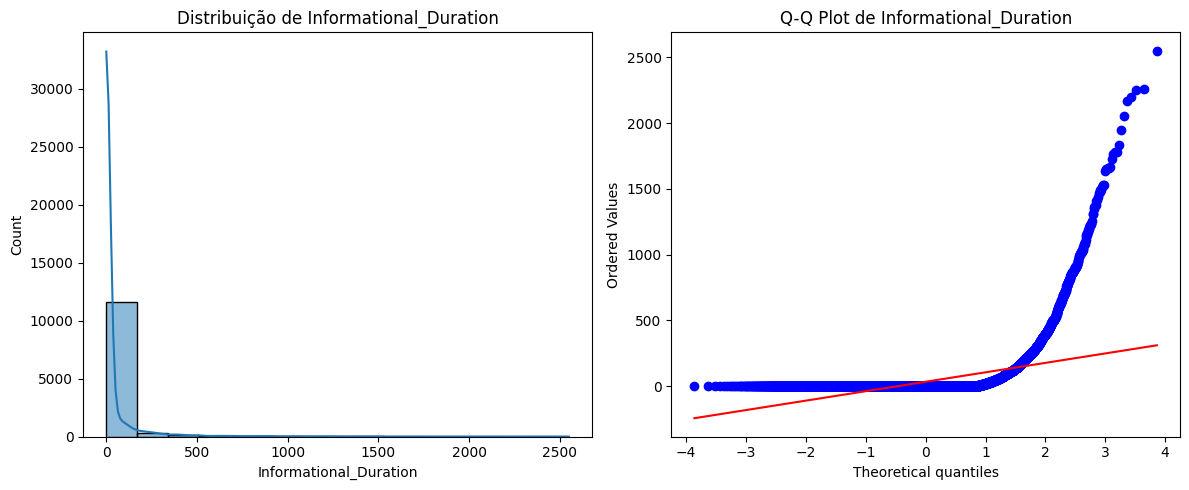

Teste de normalidade para Informational_Duration: p-value = 0.0000


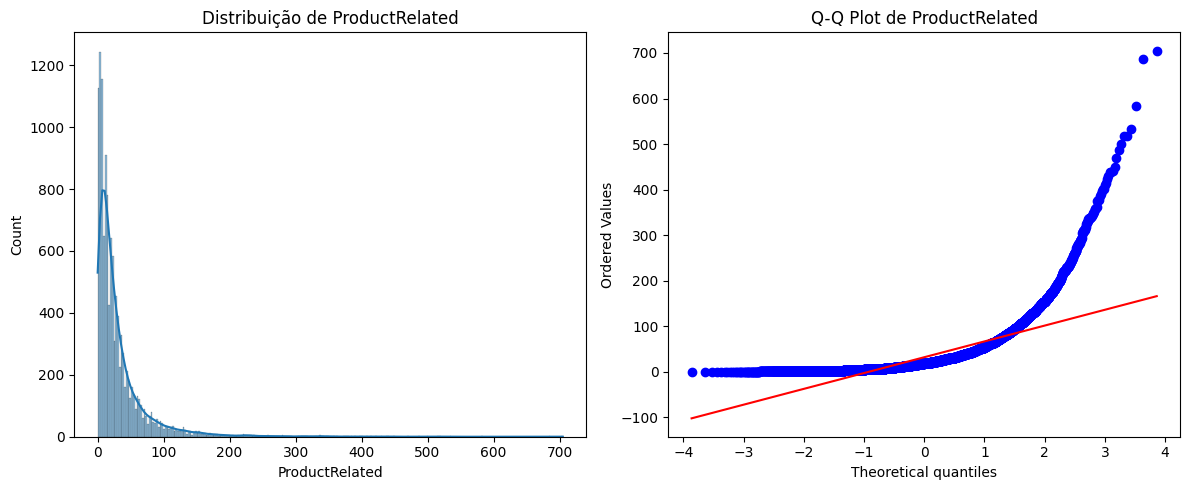

Teste de normalidade para ProductRelated: p-value = 0.0000


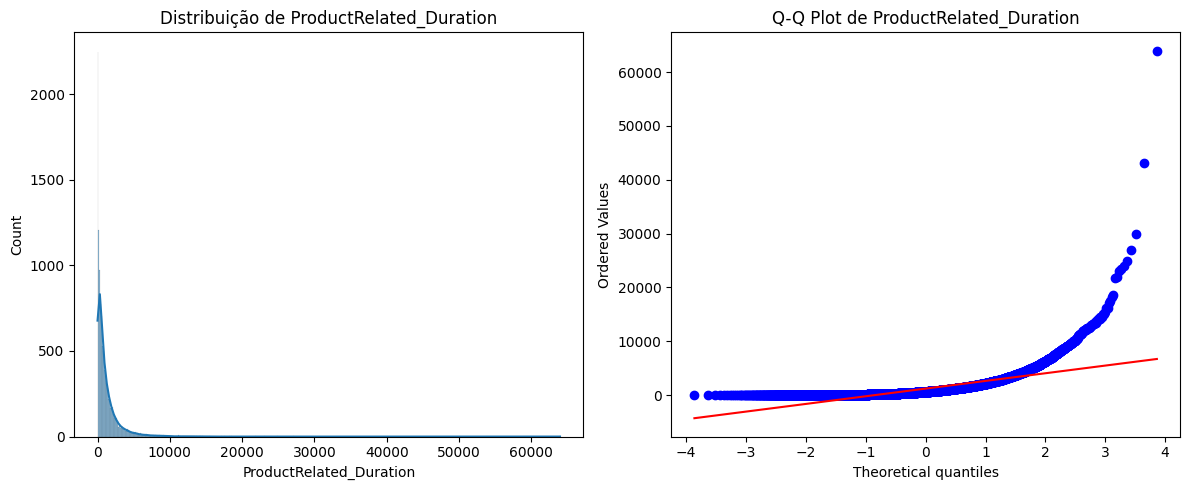

Teste de normalidade para ProductRelated_Duration: p-value = 0.0000


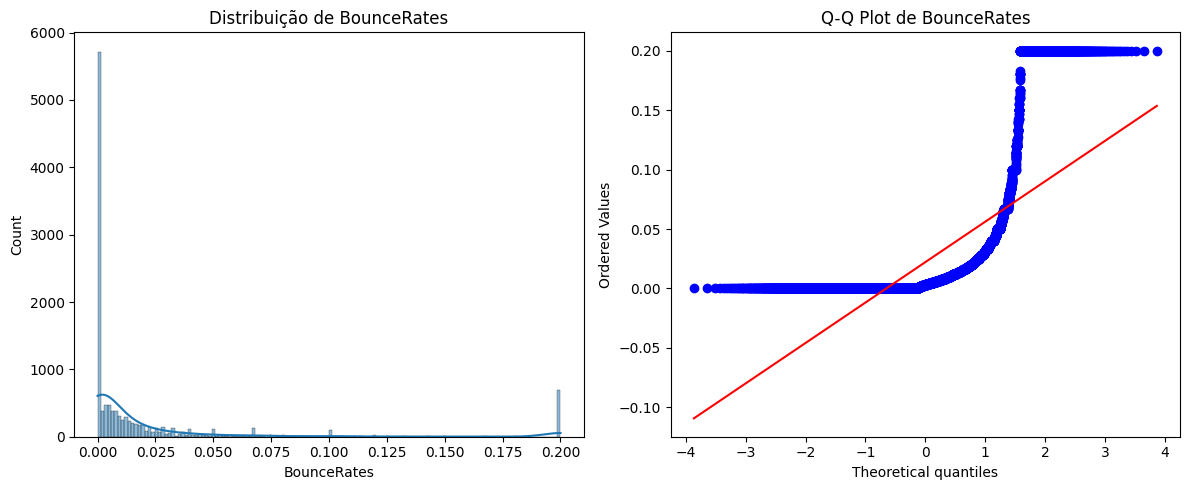

Teste de normalidade para BounceRates: p-value = 0.0000


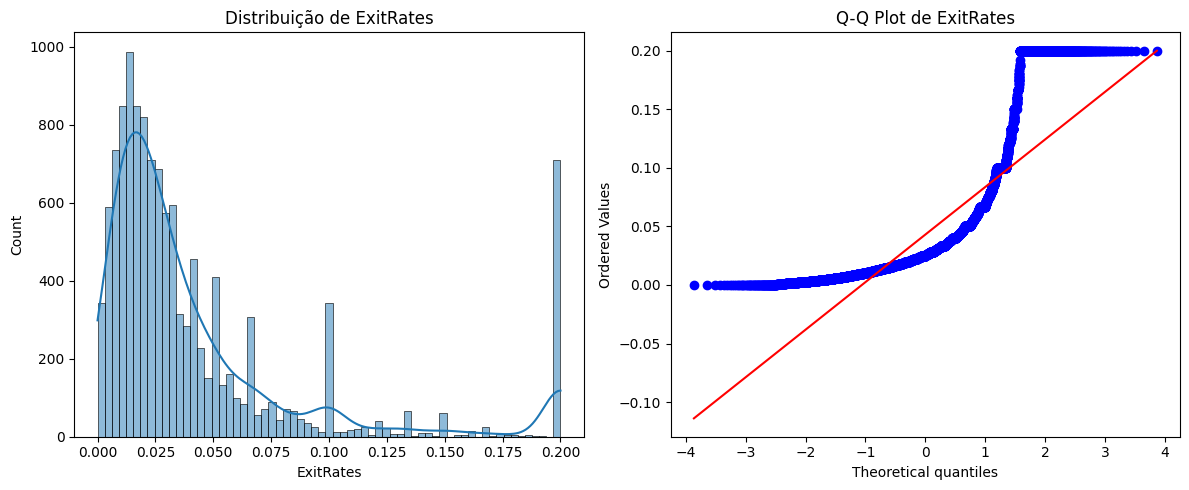

Teste de normalidade para ExitRates: p-value = 0.0000


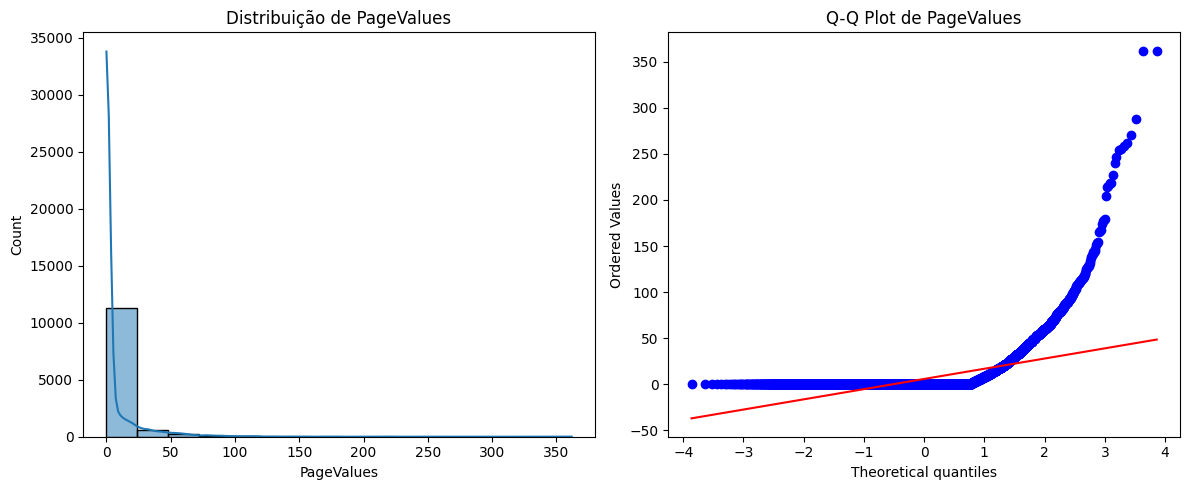

Teste de normalidade para PageValues: p-value = 0.0000


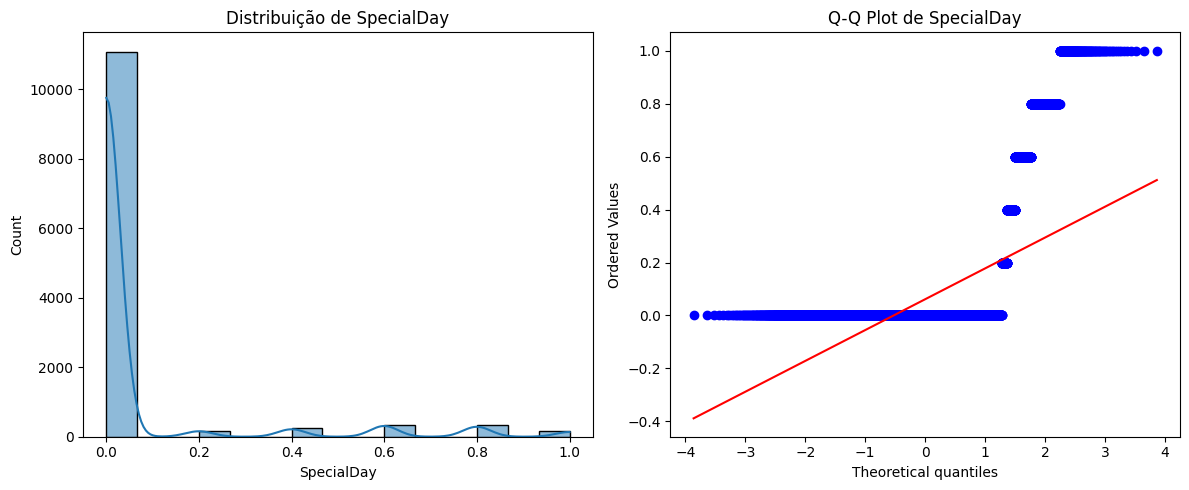

Teste de normalidade para SpecialDay: p-value = 0.0000


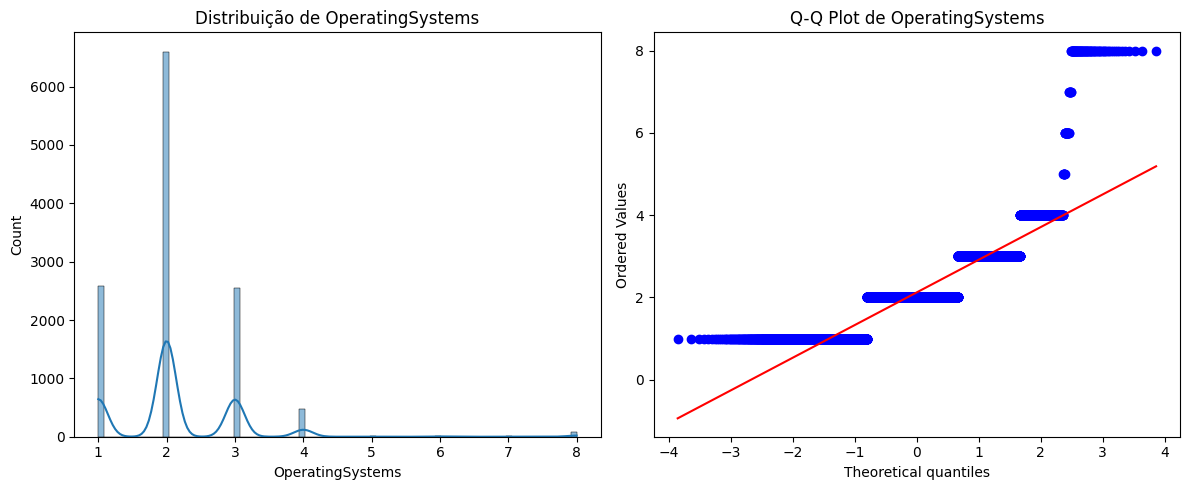

Teste de normalidade para OperatingSystems: p-value = 0.0000


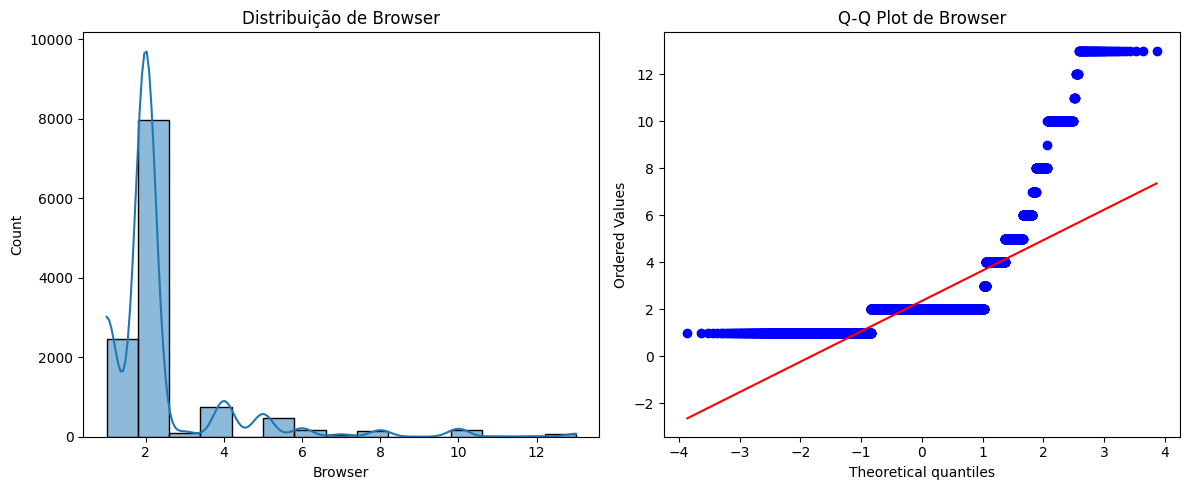

Teste de normalidade para Browser: p-value = 0.0000


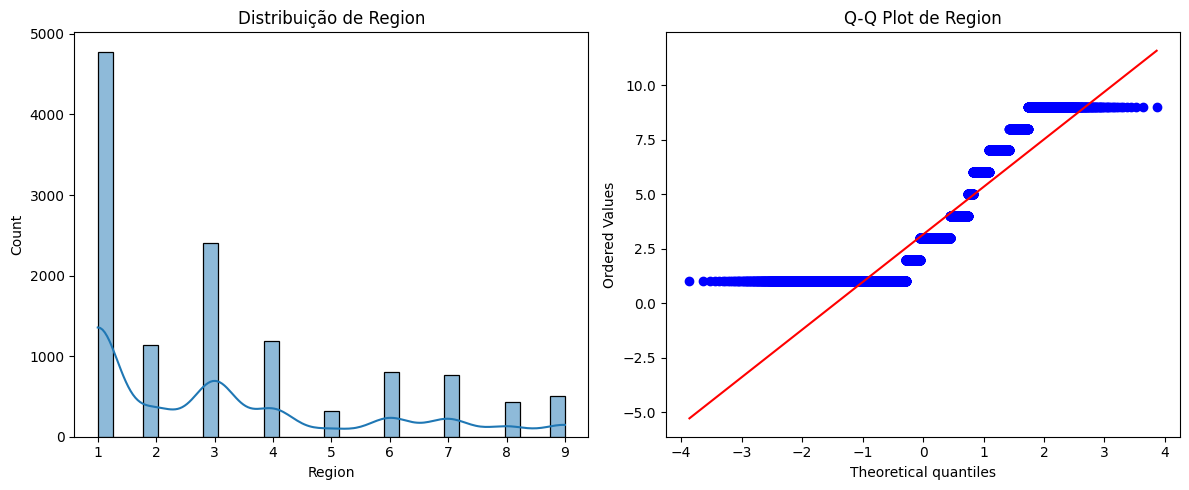

Teste de normalidade para Region: p-value = 0.0000


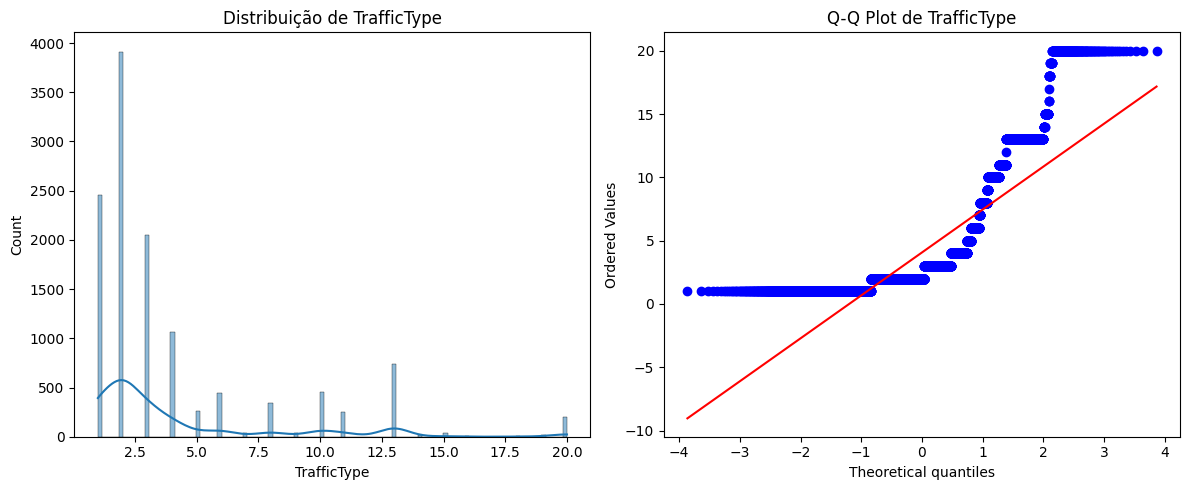

Teste de normalidade para TrafficType: p-value = 0.0000


In [8]:
# 3. Distribuição das variáveis
numeric_columns = df.select_dtypes(include=[np.number]).columns

for col in numeric_columns:
    plt.figure(figsize=(12, 5))

    # Histograma
    plt.subplot(121)
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribuição de {col}')

    # Q-Q plot
    plt.subplot(122)
    stats.probplot(df[col].dropna(), dist="norm", plot=plt)
    plt.title(f'Q-Q Plot de {col}')

    plt.tight_layout()
    plt.show()

    # Teste de normalidade
    _, p_value = stats.normaltest(df[col].dropna())
    print(f"Teste de normalidade para {col}: p-value = {p_value:.4f}")


In [9]:
# 4. Tratamento de valores ausentes
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype in ['int64', 'float64']:
            # Para variáveis numéricas, preencher com a mediana
            df[col].fillna(df[col].median(), inplace=True)
        else:
            # Para variáveis categóricas, preencher com o modo
            df[col].fillna(df[col].mode()[0], inplace=True)

print("\nValores ausentes após tratamento:")
print(df.isnull().sum())


Valores ausentes após tratamento:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [10]:
# 5. Tratamento adicional: detecção e tratamento de outliers
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\nOutliers em {col}: {len(outliers)}")

    # Opção: limitar os valores aos limites inferior e superior
    df[col] = np.clip(df[col], lower_bound, upper_bound)


Outliers em Administrative: 404

Outliers em Administrative_Duration: 1172

Outliers em Informational: 2631

Outliers em Informational_Duration: 2405

Outliers em ProductRelated: 987

Outliers em ProductRelated_Duration: 961

Outliers em BounceRates: 1551

Outliers em ExitRates: 1099

Outliers em PageValues: 2730

Outliers em SpecialDay: 1251

Outliers em OperatingSystems: 111

Outliers em Browser: 4369

Outliers em Region: 511

Outliers em TrafficType: 2101


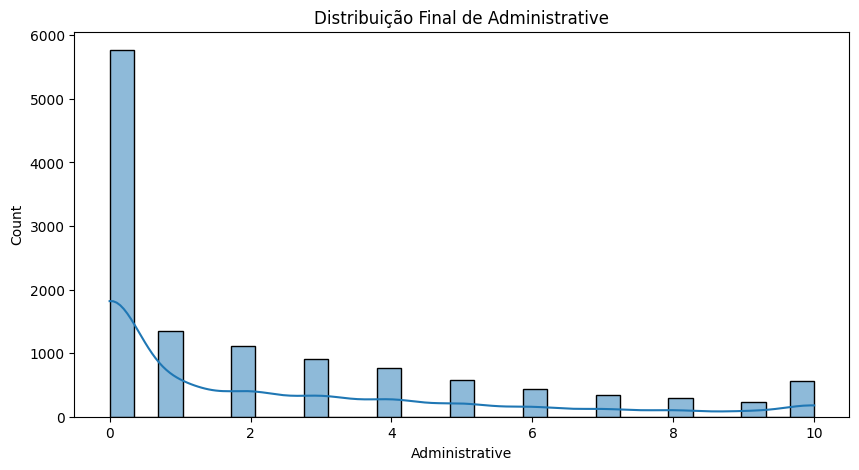

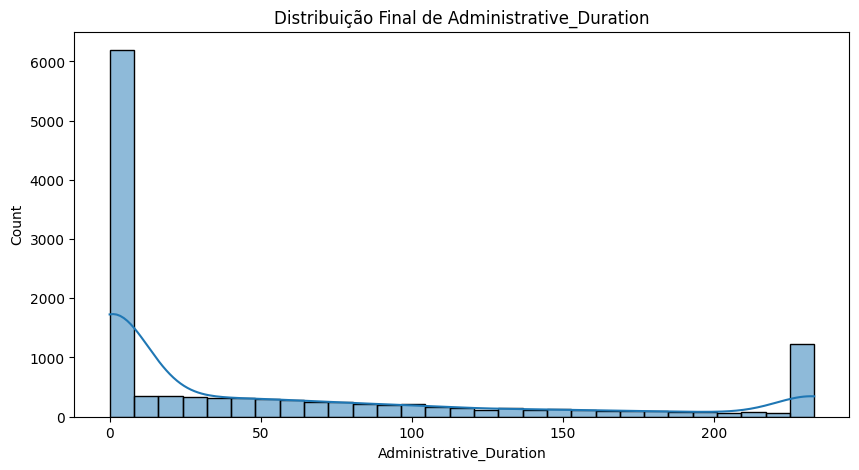

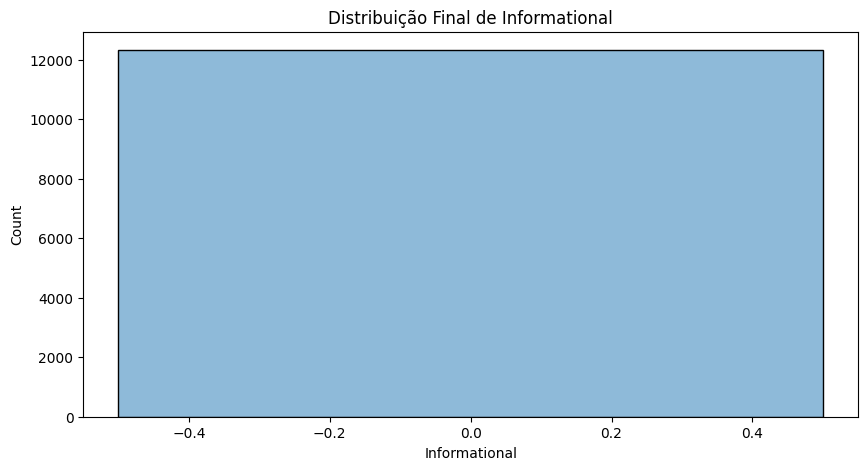

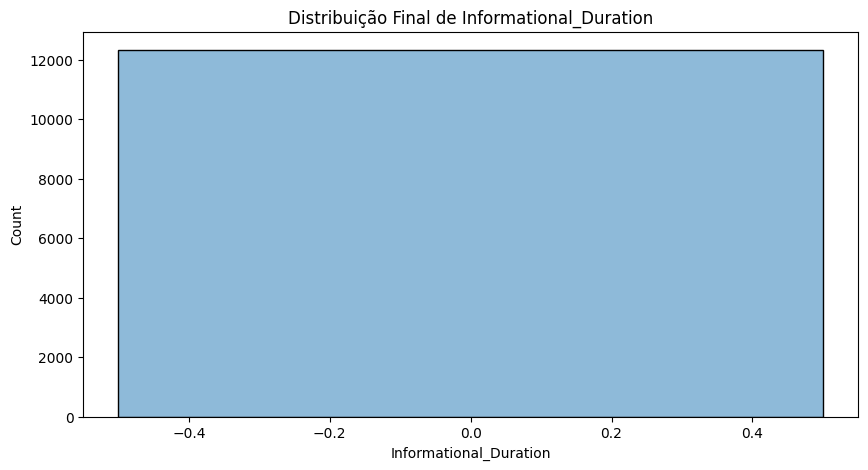

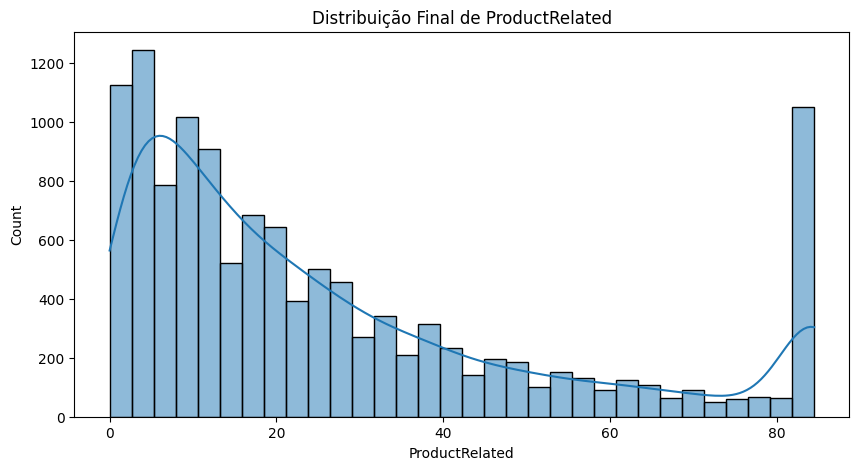

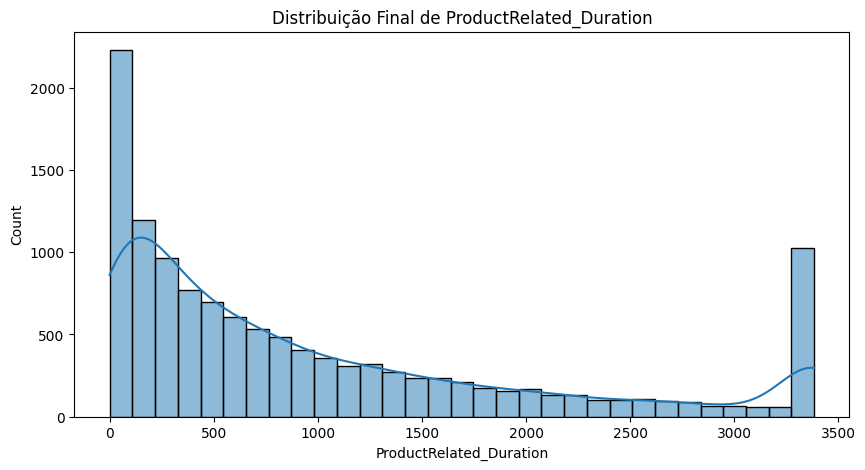

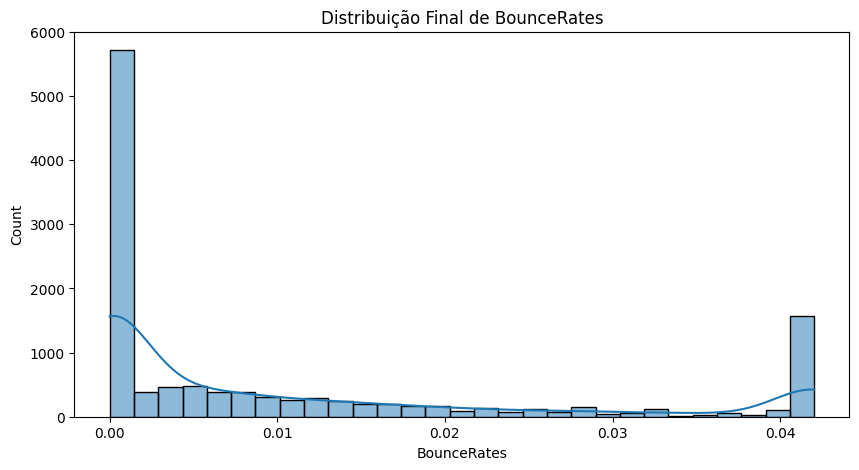

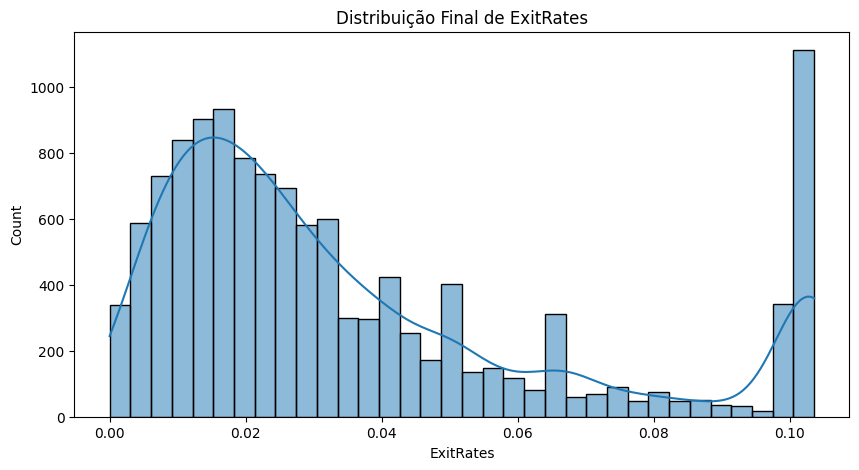

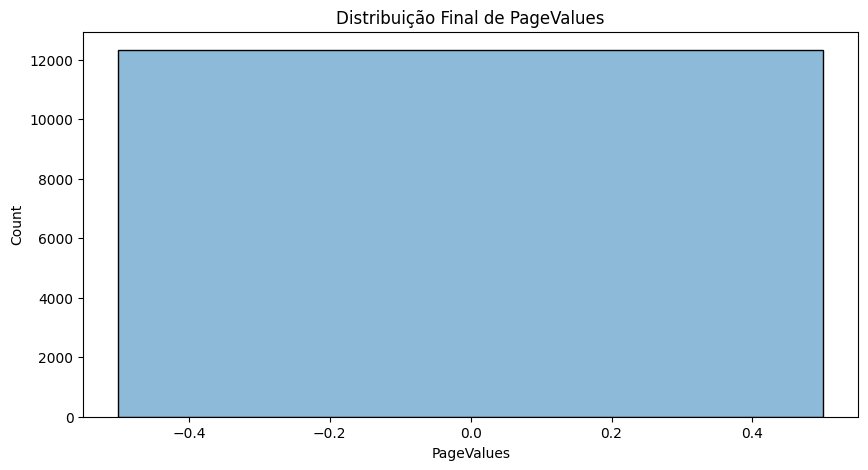

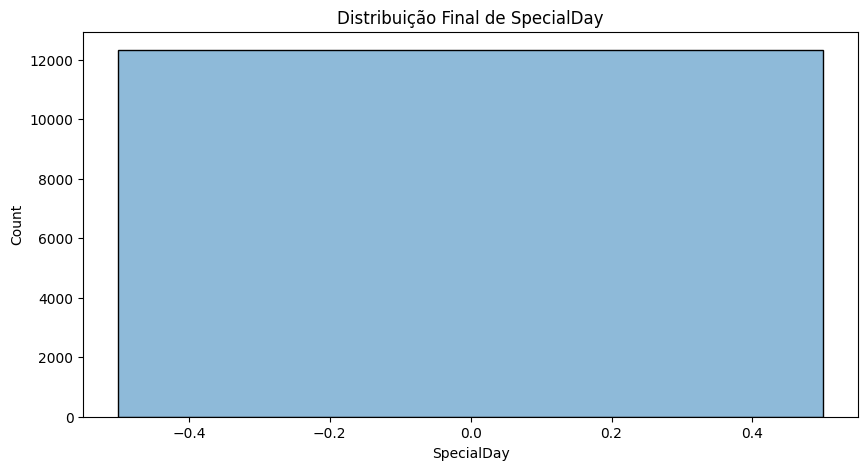

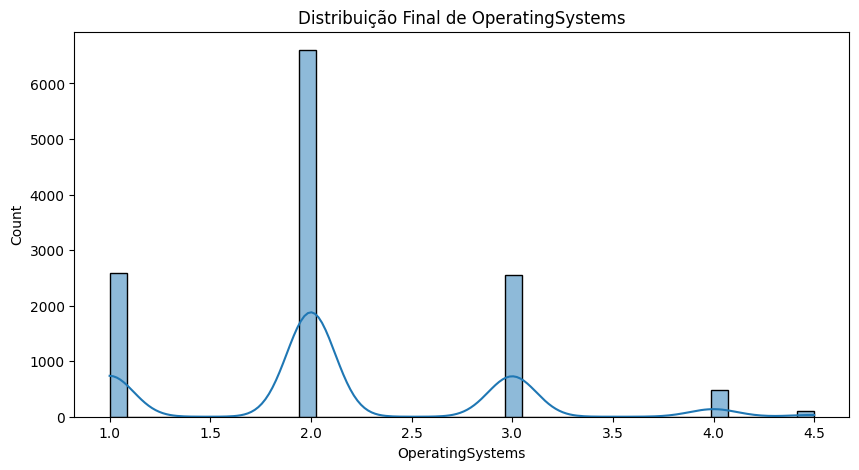

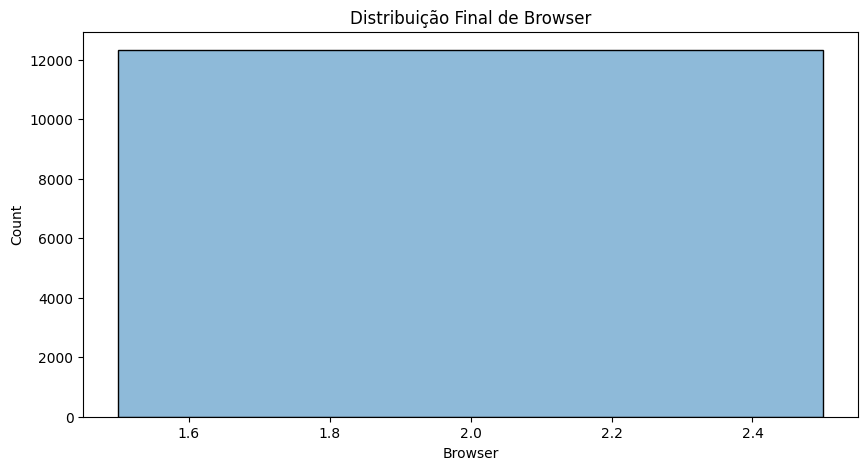

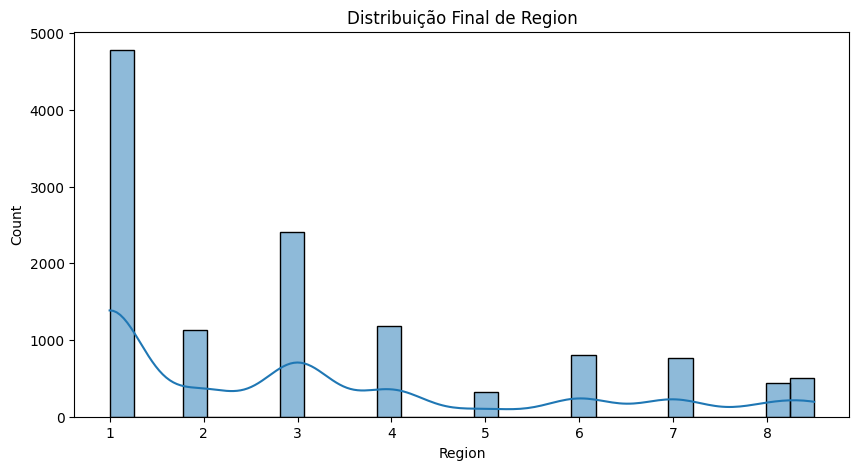

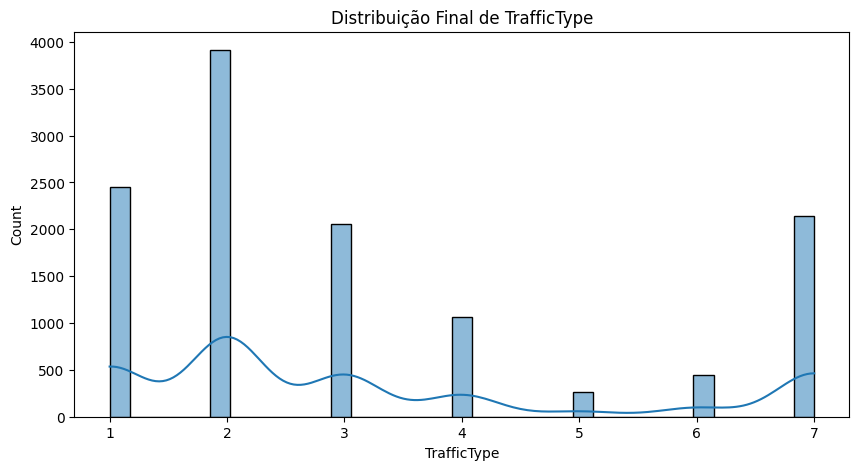

In [11]:
# 6. Visualização final da distribuição após tratamentos
for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribuição Final de {col}')
    plt.show()

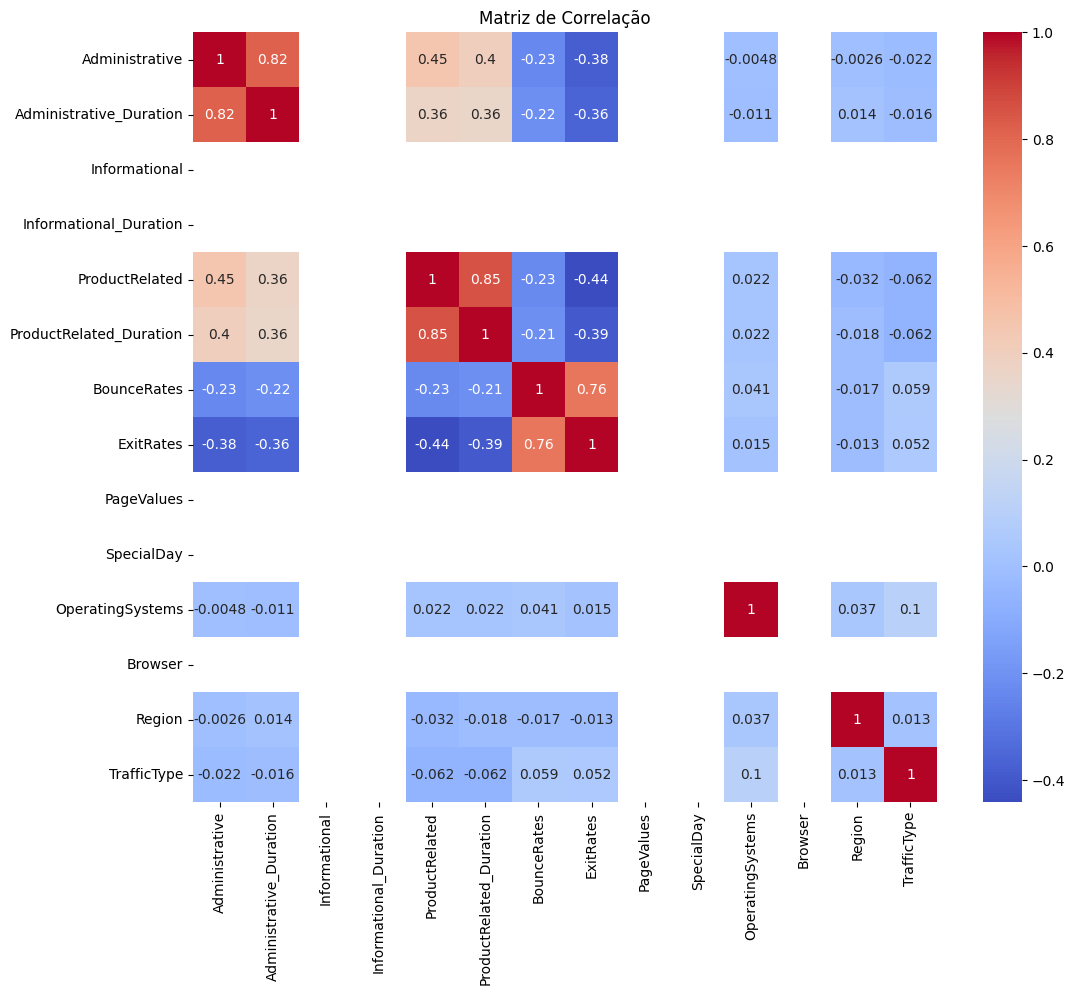


Análise e tratamento concluídos.


In [12]:
# 7. Matriz de correlação
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

print("\nAnálise e tratamento concluídos.")

In [13]:
# 1. Seleção de variáveis

# Variáveis de padrão de navegação
nav_vars = [
    'duracao_sessao',
    'num_paginas_visitadas',
    'tempo_medio_por_pagina',
    'taxa_de_rejeicao',
    'profundidade_de_scroll'
]

# Variáveis de características da data
date_vars = [
    'dia_da_semana',
    'hora_do_dia',
    'e_feriado',
    'e_fim_de_semana'
]

# Variáveis qualitativas (exemplo)
cat_vars = [
    'dispositivo',
    'navegador',
    'origem_trafego'
]

# Combinar todas as variáveis
selected_vars = nav_vars + date_vars + cat_vars

In [14]:
df['duracao_sessao'] = 0
df['num_paginas_visitadas'] = 0
df['tempo_medio_por_pagina'] = 0
df['taxa_de_rejeicao'] = 0
df['profundidade_de_scroll'] = 0
df['dia_da_semana'] = 0
df['hora_do_dia'] = 0
df['e_feriado'] = 0
df['e_fim_de_semana'] = 0
df['dispositivo'] = 0
df['navegador'] = 0
df['origem_trafego'] = 0
df['duracao_sessao'] = df['duracao_sessao'].astype(str)
df['num_paginas_visitadas'] = df['num_paginas_visitadas'].astype(str)
df['tempo_medio_por_pagina'] = df['tempo_medio_por_pagina'].astype(str)
df['taxa_de_rejeicao'] = df['taxa_de_rejeicao'].astype(str)
df['profundidade_de_scroll'] = df['profundidade_de_scroll'].astype(str)
df['dia_da_semana'] = df['dia_da_semana'].astype(str)
df['hora_do_dia'] = df['hora_do_dia'].astype(str)
df['e_feriado'] = df['e_feriado'].astype(str)
df['e_fim_de_semana'] = df['e_fim_de_semana'].astype(str)
df['dispositivo'] = df['dispositivo'].astype(str)
df['navegador'] = df['navegador'].astype(str)
df['origem_trafego'] = df['origem_trafego'].astype(str)

In [15]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,tempo_medio_por_pagina,taxa_de_rejeicao,profundidade_de_scroll,dia_da_semana,hora_do_dia,e_feriado,e_fim_de_semana,dispositivo,navegador,origem_trafego
0,0,0.0,0,0.0,1.0,0.000000,0.042031,0.103571,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.0,0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.0,0,0.0,1.0,0.000000,0.042031,0.103571,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.0,0,0.0,2.0,2.666667,0.042031,0.103571,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.0,0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  float64
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  float64
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  float64
 14  TrafficType           

In [17]:
print(df.columns)

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'duracao_sessao', 'num_paginas_visitadas',
       'tempo_medio_por_pagina', 'taxa_de_rejeicao', 'profundidade_de_scroll',
       'dia_da_semana', 'hora_do_dia', 'e_feriado', 'e_fim_de_semana',
       'dispositivo', 'navegador', 'origem_trafego'],
      dtype='object')


In [18]:
# 2. Tratamento de valores faltantes e codificação

# Separar variáveis numéricas e categóricas
numeric_vars = nav_vars + ['hora_do_dia']
# Ensure categorical_vars only includes actual categorical columns
categorical_vars = ['dia_da_semana', 'e_feriado', 'e_fim_de_semana', 'dispositivo', 'navegador', 'origem_trafego']

# Verificar se as colunas existem no DataFrame
for col in numeric_vars + categorical_vars:
    if col not in df.columns:
        print(f"Coluna '{col}' não encontrada no DataFrame.")

# Criar pipeline para variáveis numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Criar pipeline para variáveis categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combinar transformações
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_vars),
        ('cat', categorical_transformer, categorical_vars)
    ])

# Aplicar o preprocessamento
X = preprocessor.fit_transform(df)

# Obter nomes das colunas após one-hot encoding
onehot_cols = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_vars)
feature_names = numeric_vars + list(onehot_cols)

In [19]:
# Criar DataFrame com dados processados
df_processed = pd.DataFrame(X, columns=feature_names)

In [20]:
# 3. Análise descritiva dos dados processados
print(df_processed.describe())

       duracao_sessao  num_paginas_visitadas  tempo_medio_por_pagina  \
count         12330.0                12330.0                 12330.0   
mean              0.0                    0.0                     0.0   
std               0.0                    0.0                     0.0   
min               0.0                    0.0                     0.0   
25%               0.0                    0.0                     0.0   
50%               0.0                    0.0                     0.0   
75%               0.0                    0.0                     0.0   
max               0.0                    0.0                     0.0   

       taxa_de_rejeicao  profundidade_de_scroll  hora_do_dia  dia_da_semana_0  \
count           12330.0                 12330.0      12330.0          12330.0   
mean                0.0                     0.0          0.0              1.0   
std                 0.0                     0.0          0.0              0.0   
min                 0.0    

In [21]:
# 4. Verificar correlações
correlation_matrix = df_processed.corr()

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


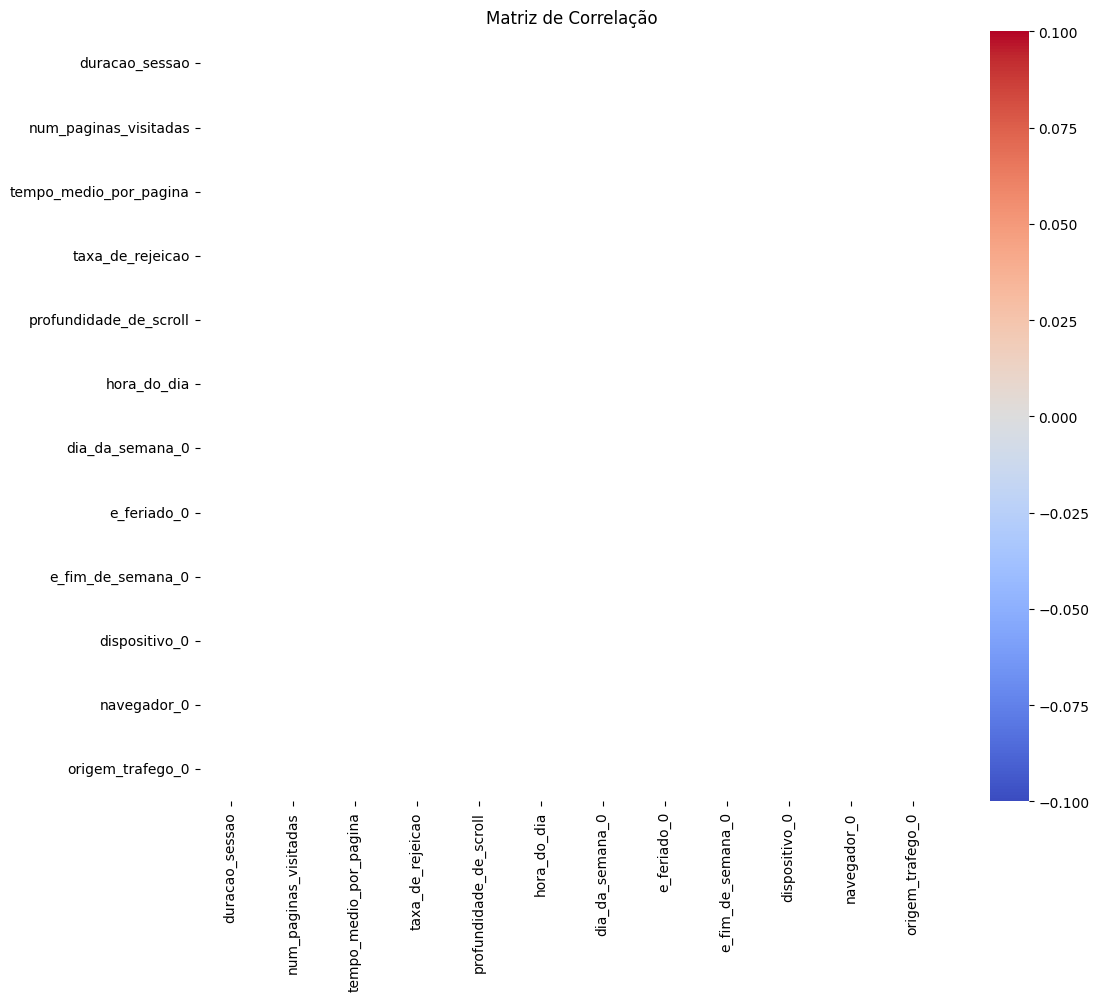

In [40]:
# Visualizar matriz de correlação

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()


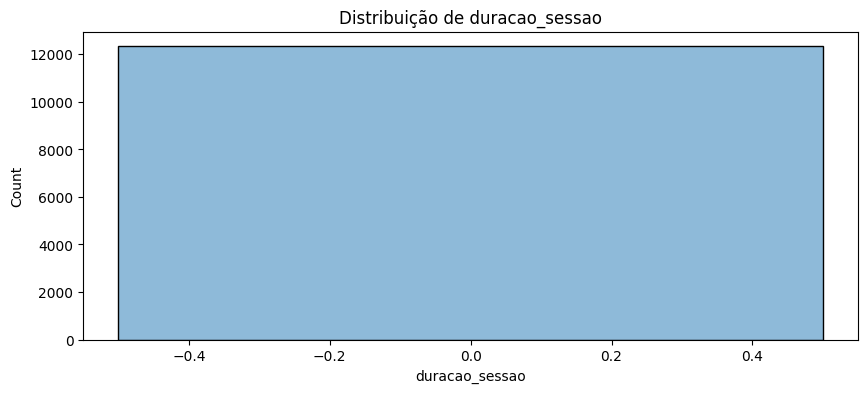

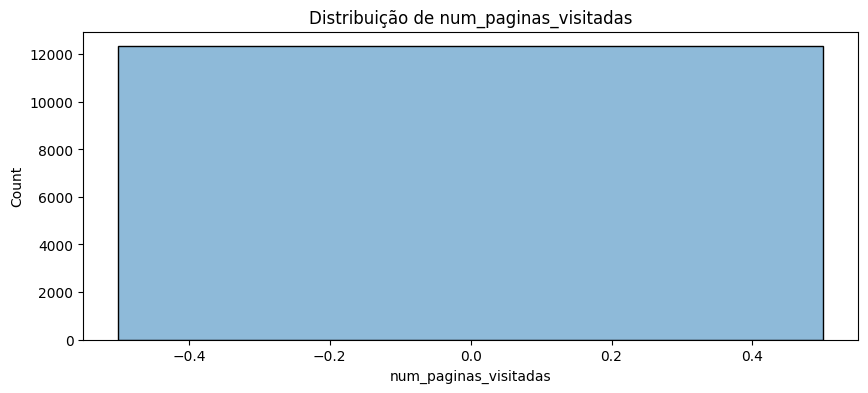

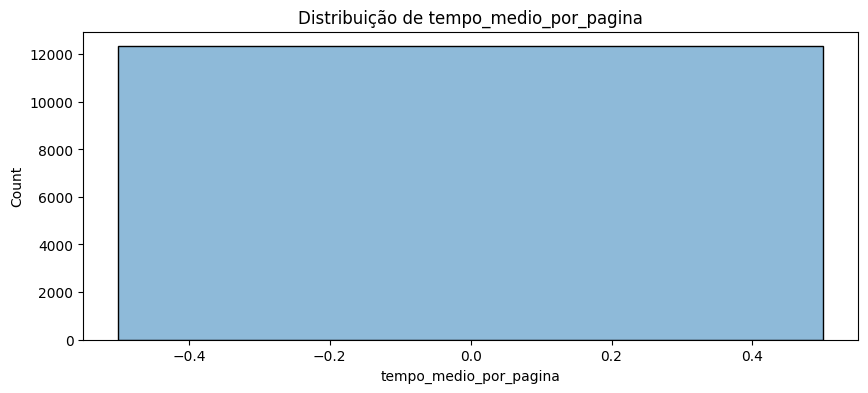

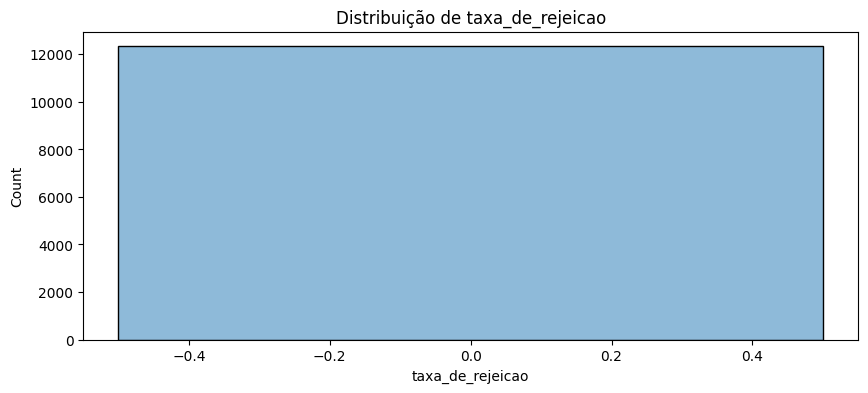

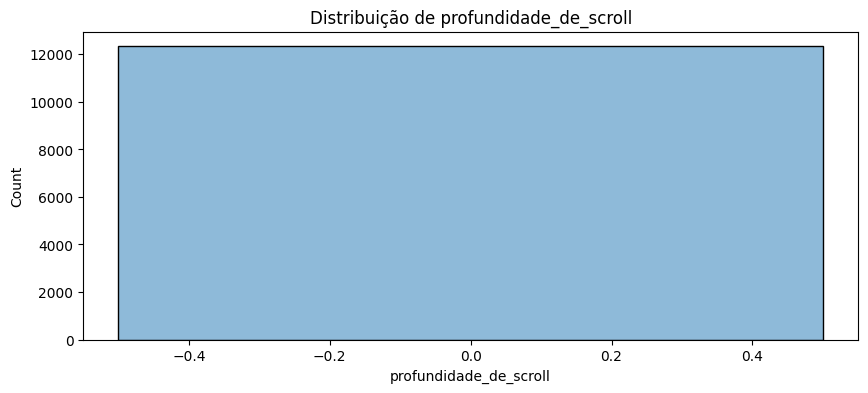

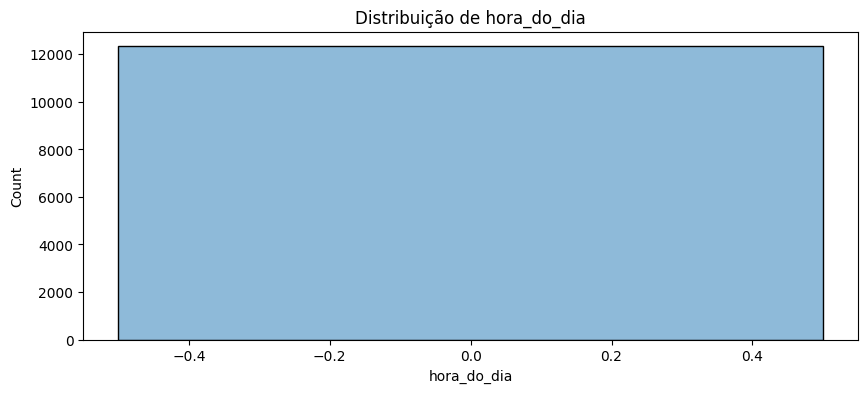

Processamento e análise concluídos.


In [23]:
# 5. Verificar a distribuição das variáveis numéricas
for col in numeric_vars:
    plt.figure(figsize=(10, 4))
    sns.histplot(df_processed[col], kde=True)
    plt.title(f'Distribuição de {col}')
    plt.show()

print("Processamento e análise concluídos.")

In [24]:
# Supondo que você tenha um DataFrame
data = df[['duracao_sessao', 'origem_trafego']]

In [25]:
# Realizar o agrupamento hierárquico
# Para 3 grupos
model_3 = AgglomerativeClustering(n_clusters=3)
df['grupo_3'] = model_3.fit_predict(data)

In [26]:
# Para 4 grupos
model_4 = AgglomerativeClustering(n_clusters=4)
df['grupo_4'] = model_4.fit_predict(data)

/usr/local/lib/python3.10/dist-packages/scipy/cluster/hierarchy.py:2818: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim([0, dvw])


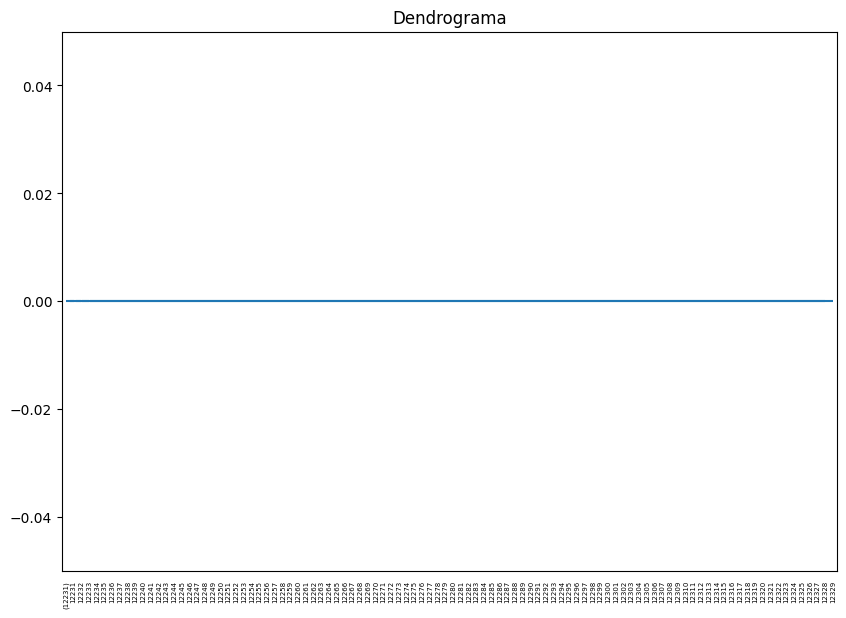

In [27]:
# Visualizar os resultados com um dendrograma
linked = linkage(data, 'ward')
plt.figure(figsize=(10, 7))

# Tente truncar o dendograma para evitar exceder o limite de recursão.
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True,
           truncate_mode='lastp', p=100) # Isso mostrará apenas os últimos 100 clusters mesclados

plt.title('Dendrograma')
plt.show()

In [28]:
# Normalizar os dados
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [29]:
# Definir o número de clusters
n_clusters = 3

In [30]:
# Aplicar K-Means
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


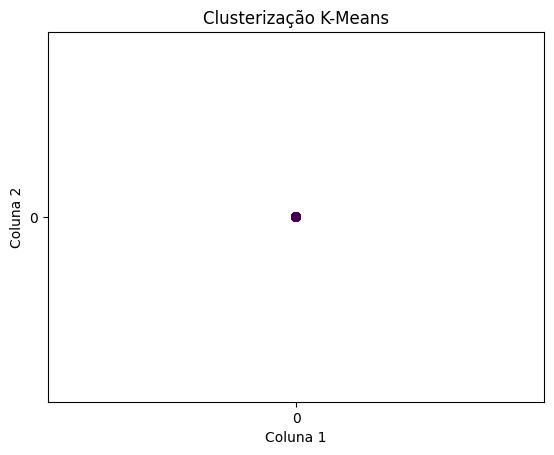

In [31]:
# Visualizar os resultados
plt.scatter(data['duracao_sessao'], data['origem_trafego'], c=df['cluster'], cmap='viridis')
plt.title('Clusterização K-Means')
plt.xlabel('Coluna 1')
plt.ylabel('Coluna 2')
plt.show()

In [32]:
# Função para calcular a distância Euclidiana
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Exemplo de uso
point_a = np.array([1, 2])
point_b = np.array([4, 6])
distance = euclidean_distance(point_a, point_b)
print(f'Distância Euclidiana: {distance}')

Distância Euclidiana: 5.0


In [33]:
# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


Text(0, 0.5, 'Revenue')

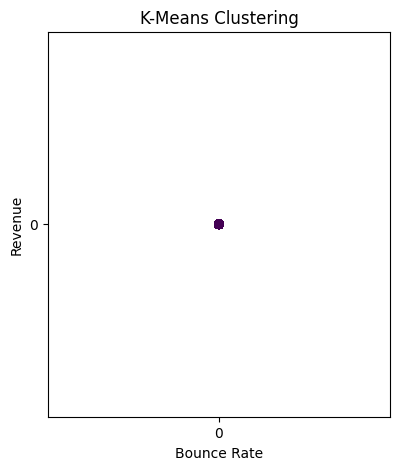

In [34]:
# Visualização dos resultados
plt.figure(figsize=(15, 5))

# K-Means
plt.subplot(1, 3, 1)
plt.scatter(df['duracao_sessao'], df['origem_trafego'], c=df['kmeans_cluster'], cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Bounce Rate')
plt.ylabel('Revenue')

In [35]:
# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(data_scaled)

Text(0, 0.5, 'Revenue')

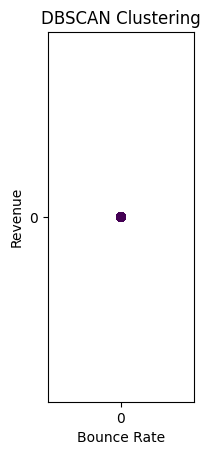

In [36]:
# DBSCAN
plt.subplot(1, 3, 2)
plt.scatter(df['duracao_sessao'], df['origem_trafego'], c=df['dbscan_cluster'], cmap='viridis')
plt.title('DBSCAN Clustering')
plt.xlabel('Bounce Rate')
plt.ylabel('Revenue')

In [37]:
# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
df['agglo_cluster'] = agglo.fit_predict(data_scaled)

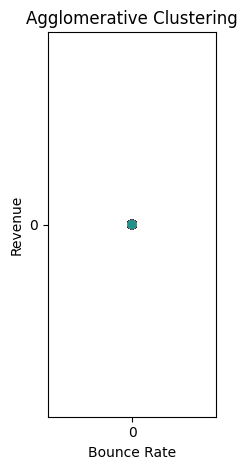

In [38]:
# Agglomerative Clustering
plt.subplot(1, 3, 3)
plt.scatter(df['duracao_sessao'], df['origem_trafego'], c=df['agglo_cluster'], cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Bounce Rate')
plt.ylabel('Revenue')

plt.tight_layout()
plt.show()